# Plot NetCDF in Matplotlib plus SHP

We first load useful libraries

In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter, StrMethodFormatter
import xarray as xr
import pandas as pd
import numpy as np
import geopandas as gp

/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


We then generate some random numbers

In [2]:
data = Dataset('../../DATA/wind.nc','r')

Blablabla

In [3]:
lons = data.variables['FNOCXN79_64'][:]
lats = data.variables['FNOCY'][:]
unwd = data.variables['UWND'][0,:,:]
data.close()

We then extract the coordinates and variables

In [4]:
df = gp.read_file('../../DATA/cb_2018_us_nation_20m.shp')
x_min, y_min, x_max, y_max = df.total_bounds

We create the plot

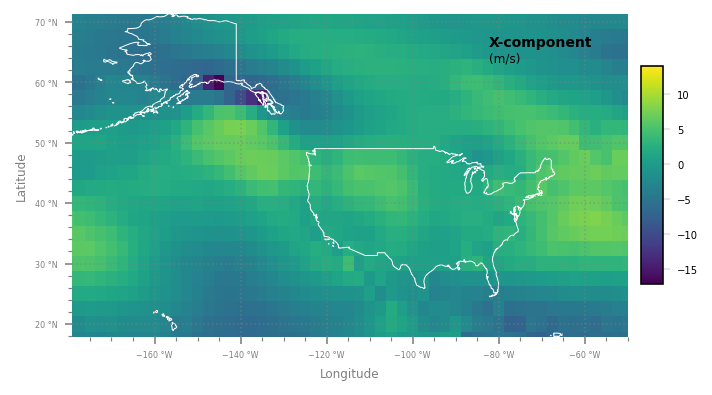

In [5]:
# plt.style.use('dark_background')
fig,ax = plt.subplots(dpi=144)

ax.set_ylim(y_min,y_max)
ax.set_xlim(x_min,-50)

ax.set_xlabel('Longitude', fontsize=6,linespacing=1, color='grey')
ax.set_ylabel('Latitude', fontsize=6, color='grey')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')

ax.text(0.75,0.90,'X-component',fontsize=7,weight='bold',transform=ax.transAxes, bbox=dict(facecolor='none',edgecolor='none',boxstyle='square')) 
ax.text(0.75,0.85,'(m/s)',fontsize=6,transform=ax.transAxes, bbox=dict(facecolor='none',edgecolor='none',boxstyle='square')) 
# ax.text(0.05,0.93,d,fontsize=4,transform=ax.transAxes, bbox=dict(facecolor='none',edgecolor='none',boxstyle='square')) 

ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=4, colors='grey')
ax.tick_params(axis='both', which='minor', labelsize=4, colors='grey')

ax.yaxis.set_major_formatter(EngFormatter(unit=u"°N"))
ax.xaxis.set_major_formatter(EngFormatter(unit=u"°W"))

mesh = ax.pcolormesh(lons,lats,unwd);
df.plot(ax=ax, facecolor='none',edgecolor='white',linewidth=0.5);
# ax.plot(lons[:],lats[:],marker='o', color='b', linestyle='none',ms=1);

cbar = plt.colorbar(mesh, ax=ax, shrink=.5, pad=.02, aspect=10)
cbar.ax.tick_params(labelsize=5, width=0.1) 

ax.grid(linestyle='dotted',linewidth=.8, alpha=0.5, color='gray')  